In [22]:
#| hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from fractalart.fractal.mandelbrot import *

In [24]:
def save_image(
    image: np.ndarray,
    path: Path,
    cmap: str = "turbo",
    dpi: int = 300,
    transparent: bool = False,
    tight: bool = True,
) -> None:
    """
    Save a NumPy array as an image file.

    Parameters
    ----------
    image : np.ndarray
        2D or 3D array representing the image.
    path : Path
        File path where the image will be saved.
    cmap : str, optional
        Matplotlib colormap to apply (used if image is 2D). Default is "turbo".
    dpi : int, optional
        Resolution (dots per inch) of the saved image. Default is 300.
    transparent : bool, optional
        If True, save the figure with a transparent background. Default is False.
    tight : bool, optional
        If True, trims whitespace around the image. Default is True.
    """
    path = Path(path)
    path.parent.mkdir(parents=True, exist_ok=True)  # ensure folder exists

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis("off")

    # Show grayscale/color images depending on array shape
    if image.ndim == 2:  
        ax.imshow(image, cmap=cmap)
    else:  
        ax.imshow(image)
        
    fig.savefig(
        path,
        dpi=dpi,
        transparent=transparent,
        bbox_inches="tight" if tight else None,
        pad_inches=0
    )

    plt.close(fig)


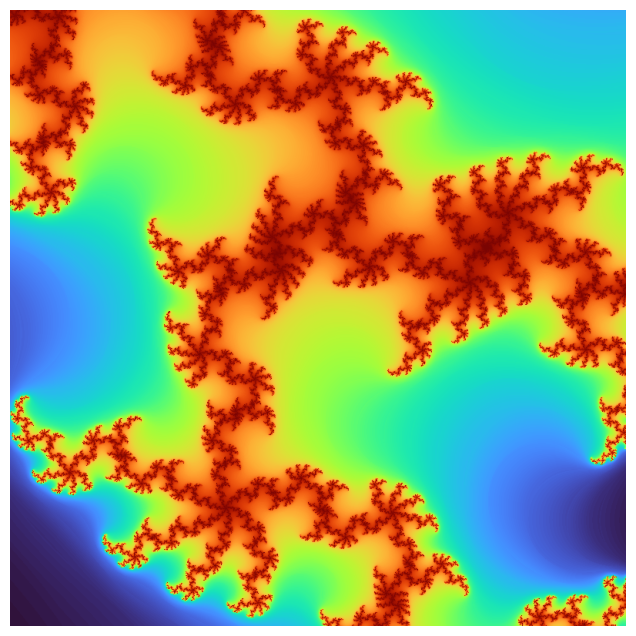

In [25]:
center = (0.42884, -0.231345)
zoom = 78125

m = Mandelbrot()
m.set_zoom(zoom, center)
m.max_iter = 1000
m.resolution = (800, 800)
image = m.render()
m.equalize_histogram()
m.plot()

In [26]:
save_image(image, path='/Users/eandreas/tmp/fractals/fractal.png')